In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("RecursosHumanos.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   BusinessTravel            1470 non-null   object 
 2   DailyRate                 1470 non-null   int64  
 3   EducationField            1470 non-null   object 
 4   EmployeeCount             1470 non-null   int64  
 5   MaritalStatus             1470 non-null   object 
 6   MonthlyIncome             1470 non-null   int64  
 7   MonthlyRate               1470 non-null   int64  
 8   NumCompaniesWorked        1470 non-null   int64  
 9   Over18                    1470 non-null   object 
 10  OverTime                  1470 non-null   object 
 11  PercentSalaryHike         1470 non-null   int64  
 12  PerformanceRating         1470 non-null   int64  
 13  RelationshipSatisfaction  1470 non-null   int64  
 14  Standard

In [4]:
data.isna().any()

,0
Age,False
BusinessTravel,False
DailyRate,False
EducationField,False
EmployeeCount,False
MaritalStatus,False
MonthlyIncome,False
MonthlyRate,False
NumCompaniesWorked,False
Over18,False


#Limpiar datos

##Eliminar columnas irrelevantes

In [5]:
data.nunique()

,0
Age,43
BusinessTravel,3
DailyRate,886
EducationField,6
EmployeeCount,1
MaritalStatus,3
MonthlyIncome,1349
MonthlyRate,1427
NumCompaniesWorked,10
Over18,1


In [6]:
data.describe()

,Age,DailyRate,EmployeeCount,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,...,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction
count,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,...,1470.000000,1470.000000,1329.000000,1413.000000,1397.000000,1390.000000,1408.000000,1297.000000,1293.000000,1292.000000
mean,36.923810,802.485714,1.0,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,...,2.187755,4.123129,9.036117,2.906582,951.669291,2.716547,61.628551,2.728604,2.057231,2.732198
std,9.135373,403.509100,0.0,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,...,3.222430,3.568136,8.136277,1.030577,634.908965,1.097257,24.906945,0.714957,1.097339,1.098319
min,18.000000,102.000000,1.0,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000
25%,30.000000,465.000000,1.0,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,...,0.000000,2.000000,2.000000,2.000000,387.000000,2.000000,45.000000,2.000000,1.000000,2.000000
50%,36.000000,802.000000,1.0,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,...,1.000000,3.000000,7.000000,3.000000,947.000000,3.000000,63.000000,3.000000,2.000000,3.000000
75%,43.000000,1157.000000,1.0,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,...,3.000000,7.000000,14.000000,4.000000,1504.000000,4.000000,82.000000,3.000000,3.000000,4.000000
max,60.000000,1499.000000,1.0,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,...,15.000000,17.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000


In [7]:
#Columnas que solo tienen un unico valor, son innecesarias para este estudio
data.drop(columns=['EmployeeCount'], inplace=True)
data.drop(columns=['Over18'], inplace=True)
data.drop(columns=['StandardHours'], inplace=True)

In [8]:
data["Attrition"].value_counts()

,count
Attrition,
No,1233
Yes,237


## Cambiar Formato

In [9]:
for col in data.columns:
    if pd.api.types.is_object_dtype(data[col]):
        data[col] = data[col].str.lower()

## Cambiar a valores unicos

In [10]:
data['BusinessTravel'].unique()

array(['travel_rarely', 'travel_frequently', 'non-travel'], dtype=object)

In [11]:
data['Department'].unique()

array(['sales', 'research & development', nan, 'research & ', 'sa',
       'human resources', 'human r'], dtype=object)

In [12]:
data['Department'] = data['Department'].replace({
    'sa': 'sales',
    'research & ': 'research & development',
    'human r': 'human resources'
})

In [13]:
#Verificar cambios
data['Department'].unique()

array(['sales', 'research & development', nan, 'human resources'],
      dtype=object)

In [14]:
data['EducationField'].unique()

array(['life sciences', 'other', 'medical', 'marketing',
       'technical degree', 'human resources'], dtype=object)

In [15]:
data['Gender'].unique()

array([nan, 'male', 'ma', 'female', 'fem'], dtype=object)

In [16]:
data['Gender'] = data['Gender'].replace({
    'ma': 'male',
    'fem': 'female'
})

In [17]:
#Verificar cambios
data['Gender'].unique()

array([nan, 'male', 'female'], dtype=object)

In [18]:
data['JobRole'].unique()

array(['sales executive', 'research scientist', 'laboratory technician',
       'manufacturing director', 'healthcare representative', 'manager',
       'sales representative', 'research director', 'human resources'],
      dtype=object)

In [19]:
data['MaritalStatus'].unique()

array(['single', 'married', 'divorced'], dtype=object)

In [20]:
data['OverTime'].unique()

array(['yes', 'no'], dtype=object)

## Rellenar datos faltantes Categoricos

In [21]:
data['Department'].isna().sum()

74

In [22]:
moda_Department = data["Department"].mode()[0]
data["Department"].fillna(moda_Department, inplace=True)

In [23]:
data['Gender'].isna().sum()

87

In [24]:
moda_Gender = data["Gender"].mode()[0]
data["Gender"].fillna(moda_Gender, inplace=True)

##Rellenar datos faltantes Cuantitativos

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

data_X_numeric = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = data_X_numeric.corr()

'''plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()'''

'plt.figure(figsize=(16, 16))\nsns.heatmap(correlation_matrix, annot=True, cmap=\'coolwarm\', fmt=".2f")\nplt.title(\'Mapa de Calor de Correlación\')\nplt.show()'

In [26]:
from sklearn.linear_model import LinearRegression

# Separar las variables
X = data[["MonthlyIncome"]]
y = data["JobLevel"]

# Identificar los datos faltantes en y
datos_faltantes = y.isnull()

# Filtrar solo los datos completos para ajustar el modelo
X_completos = X[~datos_faltantes]
y_completos = y[~datos_faltantes]

# Ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_completos, y_completos)

# Predecir los valores faltantes de JobLevel
predicciones = modelo.predict(X[datos_faltantes].values.reshape(-1, 1))

# Actualizar los datos con las predicciones
data.loc[datos_faltantes, "JobLevel"] = predicciones

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
data["JobLevel"] = data["JobLevel"].round(0)

In [28]:
data.select_dtypes(include=["float64", "int64"]).isna().any()

,0
Age,False
DailyRate,False
MonthlyIncome,False
MonthlyRate,False
NumCompaniesWorked,False
PercentSalaryHike,False
PerformanceRating,False
RelationshipSatisfaction,False
StockOptionLevel,False
TotalWorkingYears,False


In [29]:
data["DistanceFromHome"].fillna(method='ffill', inplace=True)
data["DistanceFromHome"].fillna(method='bfill', inplace=True)
data["DistanceFromHome"] = data["DistanceFromHome"].round(0)

<ipython-input-29-48f1566e7676>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["DistanceFromHome"].fillna(method='ffill', inplace=True)
<ipython-input-29-48f1566e7676>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["DistanceFromHome"].fillna(method='bfill', inplace=True)


In [30]:
data["Education"].fillna(method='ffill', inplace=True)
data["Education"].fillna(method='bfill', inplace=True)
data["Education"] = data["Education"].round(0)

<ipython-input-30-73ea4333f79a>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Education"].fillna(method='ffill', inplace=True)
<ipython-input-30-73ea4333f79a>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["Education"].fillna(method='bfill', inplace=True)


In [31]:
data["EmployeeNumber"].fillna(method='ffill', inplace=True)
data["EmployeeNumber"].fillna(method='bfill', inplace=True)
data["EmployeeNumber"] = data["EmployeeNumber"].round(0)

<ipython-input-31-f810f2219fb5>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["EmployeeNumber"].fillna(method='ffill', inplace=True)
<ipython-input-31-f810f2219fb5>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["EmployeeNumber"].fillna(method='bfill', inplace=True)


In [32]:
data["EnvironmentSatisfaction"].fillna(method='ffill', inplace=True)
data["EnvironmentSatisfaction"].fillna(method='bfill', inplace=True)
data["EnvironmentSatisfaction"] = data["EnvironmentSatisfaction"].round(0)

<ipython-input-32-e0ea2c47f30d>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["EnvironmentSatisfaction"].fillna(method='ffill', inplace=True)
<ipython-input-32-e0ea2c47f30d>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["EnvironmentSatisfaction"].fillna(method='bfill', inplace=True)


In [33]:
data["HourlyRate"].fillna(method='ffill', inplace=True)
data["HourlyRate"].fillna(method='bfill', inplace=True)
data["HourlyRate"] = data["HourlyRate"].round(0)

<ipython-input-33-cb3e7b04035c>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["HourlyRate"].fillna(method='ffill', inplace=True)
<ipython-input-33-cb3e7b04035c>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["HourlyRate"].fillna(method='bfill', inplace=True)


In [34]:
data["JobInvolvement"].fillna(method='ffill', inplace=True)
data["JobInvolvement"].fillna(method='bfill', inplace=True)
data["JobInvolvement"] = data["JobInvolvement"].round(0)

<ipython-input-34-12a1ae71bf85>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["JobInvolvement"].fillna(method='ffill', inplace=True)
<ipython-input-34-12a1ae71bf85>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["JobInvolvement"].fillna(method='bfill', inplace=True)


In [35]:
data["JobSatisfaction"].fillna(method='ffill', inplace=True)
data["JobSatisfaction"].fillna(method='bfill', inplace=True)
data["JobSatisfaction"] = data["JobSatisfaction"].round(0)

<ipython-input-35-6b50c61a3704>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["JobSatisfaction"].fillna(method='ffill', inplace=True)
<ipython-input-35-6b50c61a3704>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["JobSatisfaction"].fillna(method='bfill', inplace=True)


In [36]:
for col in data.columns: ##Modificar float
    if pd.api.types.is_float_dtype(data[col]):
        data[col] = data[col].astype(int)

In [37]:
data.select_dtypes(include=["int64"]).isna().any()

,0
Age,False
DailyRate,False
MonthlyIncome,False
MonthlyRate,False
NumCompaniesWorked,False
PercentSalaryHike,False
PerformanceRating,False
RelationshipSatisfaction,False
StockOptionLevel,False
TotalWorkingYears,False


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   EducationField            1470 non-null   object
 4   MaritalStatus             1470 non-null   object
 5   MonthlyIncome             1470 non-null   int64 
 6   MonthlyRate               1470 non-null   int64 
 7   NumCompaniesWorked        1470 non-null   int64 
 8   OverTime                  1470 non-null   object
 9   PercentSalaryHike         1470 non-null   int64 
 10  PerformanceRating         1470 non-null   int64 
 11  RelationshipSatisfaction  1470 non-null   int64 
 12  StockOptionLevel          1470 non-null   int64 
 13  TotalWorkingYears         1470 non-null   int64 
 14  TrainingTimesLastYear   

In [39]:
data.nunique()

,0
Age,43
BusinessTravel,3
DailyRate,886
EducationField,6
MaritalStatus,3
MonthlyIncome,1349
MonthlyRate,1427
NumCompaniesWorked,10
OverTime,2
PercentSalaryHike,15


##Eliminamos los Outliers

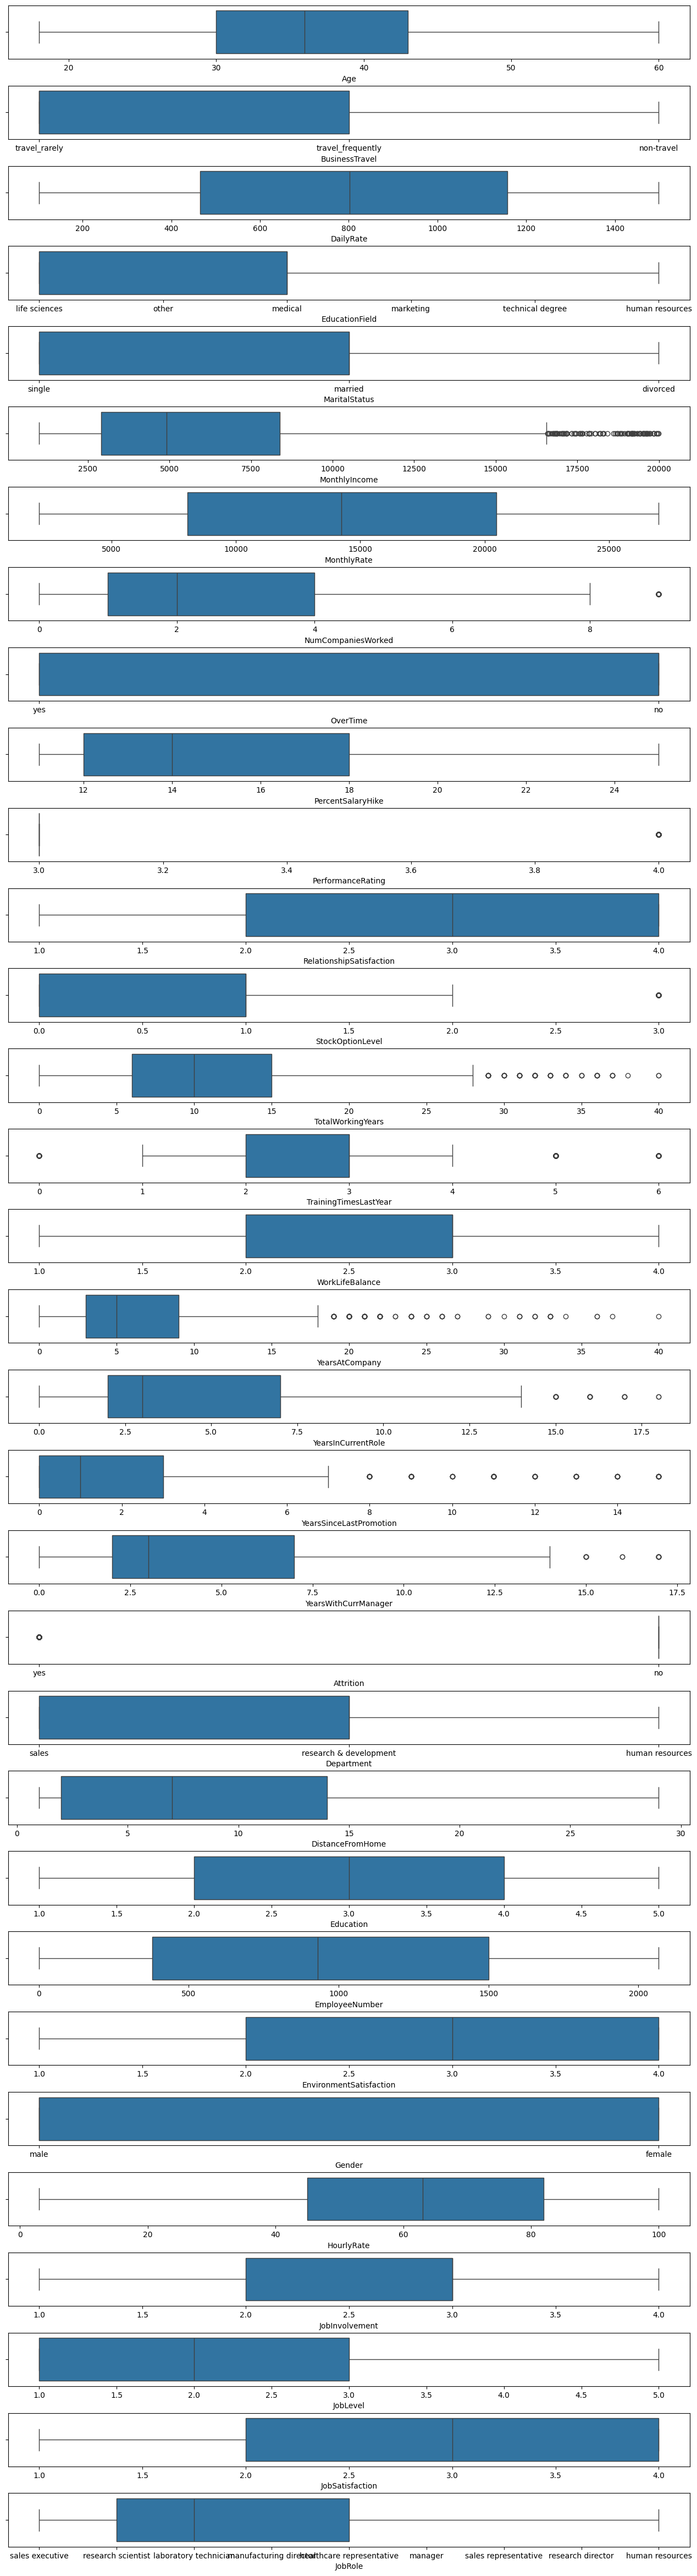

In [40]:
fig, ax = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(16,60))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(data.columns):
    sns.boxplot(x=col, data=data, ax=ax[i])

In [41]:
def filtrar_outliers(data, columna):
    # Calcular los cuartiles
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Calcular los límites inferior y superior para los outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar los outliers
    data_filtrada = data[(data[columna] < limite_superior) & (data[columna] >= limite_inferior)]

    return data_filtrada

data = filtrar_outliers(data, 'YearsAtCompany')
data = filtrar_outliers(data, 'YearsSinceLastPromotion')
data = filtrar_outliers(data, 'TotalWorkingYears')
data = filtrar_outliers(data, 'YearsInCurrentRole')

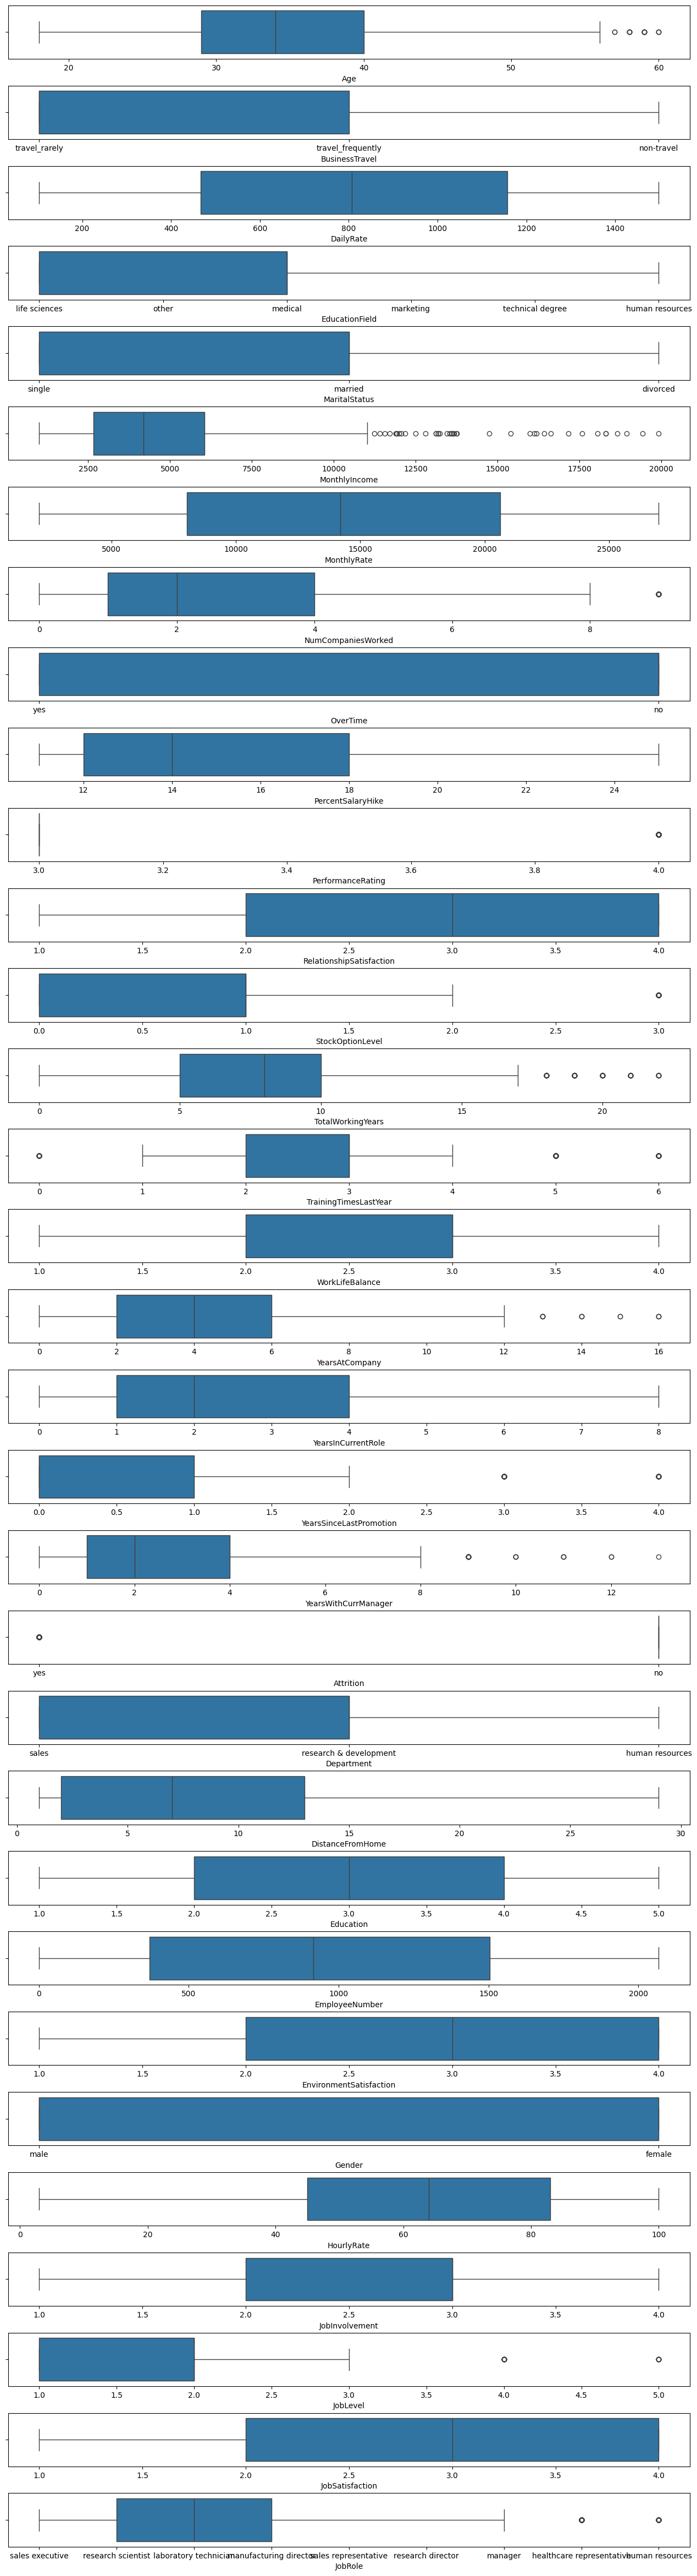

In [42]:
fig, ax = plt.subplots(nrows=len(data.columns), ncols=1, figsize=(16,60))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(data.columns):
    sns.boxplot(x=col, data=data, ax=ax[i])

##Data Limpia

In [43]:
data.shape

(1041, 32)

#Transformacion

## Analizamos nuestros datos para ver que trasformacion utilizaremos

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1041 non-null   int64 
 1   BusinessTravel            1041 non-null   object
 2   DailyRate                 1041 non-null   int64 
 3   EducationField            1041 non-null   object
 4   MaritalStatus             1041 non-null   object
 5   MonthlyIncome             1041 non-null   int64 
 6   MonthlyRate               1041 non-null   int64 
 7   NumCompaniesWorked        1041 non-null   int64 
 8   OverTime                  1041 non-null   object
 9   PercentSalaryHike         1041 non-null   int64 
 10  PerformanceRating         1041 non-null   int64 
 11  RelationshipSatisfaction  1041 non-null   int64 
 12  StockOptionLevel          1041 non-null   int64 
 13  TotalWorkingYears         1041 non-null   int64 
 14  TrainingTimesLastYear     104

In [45]:
'''for col in cols_num:
    plt.figure()
    sns.histplot(data[col])
    plt.show()'''

'for col in cols_num:\n    plt.figure()\n    sns.histplot(data[col])\n    plt.show()'

##Metodos de estandarizacion en datos Numericos

###Metodo utilizado Standar Scaler

In [46]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

cols_num = data.select_dtypes(include=["int64"]).columns
data_numerica = data[cols_num]

In [47]:
data_numerica

,Age,DailyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,...,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction
0,41,1102,5993,19479,8,11,3,1,0,8,...,0,5,1,2,1,2,94,2,2,4
1,49,279,5130,24907,1,23,4,4,1,10,...,1,7,8,1,2,3,6,2,2,2
2,37,1373,2090,2396,6,15,3,2,0,7,...,0,0,2,2,2,4,9,2,1,3
3,33,1392,2909,23159,1,11,3,3,0,8,...,3,0,3,4,5,4,56,3,1,3
4,27,591,3468,16632,9,12,3,4,1,6,...,2,2,2,1,7,1,40,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,2571,12290,4,17,3,3,1,17,...,0,3,5,2,2061,3,41,4,2,4
1466,39,613,9991,21457,4,15,3,1,1,9,...,1,7,6,1,20,4,42,2,3,1
1467,27,155,6142,5174,1,20,4,2,1,6,...,0,3,6,3,2064,2,87,2,2,1
1468,49,1023,5390,13243,2,14,3,4,0,17,...,0,8,2,3,2065,4,63,2,2,2


In [48]:
data_standar_scaler = preprocessing.StandardScaler().fit_transform(data_numerica)
data_standar_scaler = pd.DataFrame(data_standar_scaler, columns=[cols_num])

In [49]:
'''for col in cols_num:
    plt.figure()
    sns.histplot(data_standar_scaler[col])
    plt.title(col)
    plt.show()'''

'for col in cols_num:\n    plt.figure()\n    sns.histplot(data_standar_scaler[col])\n    plt.title(col)\n    plt.show()'

##Metodos de estandarizacion en datos Categoricos

In [50]:
from sklearn.preprocessing import OrdinalEncoder

def prepare_inputs(X):
    oe = OrdinalEncoder()
    oe.fit(X)
    X_enc = oe.transform(X)
    return X_enc

In [51]:
col_c = ['BusinessTravel', 'EducationField', 'MaritalStatus', 'OverTime', 'Attrition', 'Department', 'Gender', 'JobRole']
data_categorica = data.select_dtypes(include=[object])
data_categorica = prepare_inputs(data_categorica)
data_categorica = pd.DataFrame(data_categorica, columns=[col_c])

In [52]:
X_categorica = data_categorica.drop('Attrition', axis = 1)
y_categorica = data_categorica['Attrition']

<ipython-input-52-47853f6c5619>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_categorica = data_categorica.drop('Attrition', axis = 1)


#Reduccion

##Para datos Cualitativos

In [53]:
data_standar_scaler.shape

(1041, 24)

In [54]:
data_standar_scaler

,Age,DailyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,...,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction
0,0.729235,0.744236,0.376350,0.721256,2.130268,-1.194202,-0.423008,-1.591472,-0.899029,-0.013195,...,-0.776891,0.842962,-1.011519,-0.814052,-1.463753,-0.638475,1.282099,-1.012806,0.415906,1.167061
1,1.669339,-1.314744,0.087410,1.481573,-0.678864,2.165701,2.364024,1.205471,0.250712,0.403045,...,0.226513,1.614751,-0.132247,-1.770518,-1.462198,0.274509,-2.288802,-1.012806,0.415906,-0.653030
2,0.259183,1.422223,-0.930411,-1.671614,1.327659,-0.074234,-0.423008,-0.659158,-0.899029,-0.221315,...,-0.776891,-1.086510,-0.885909,-0.814052,-1.462198,1.187494,-2.167067,-1.012806,-0.888185,0.257016
3,-0.210869,1.469757,-0.656202,1.236725,-0.678864,-1.194202,-0.423008,0.273157,-0.899029,-0.013195,...,2.233320,-1.086510,-0.760299,1.098879,-1.457534,1.187494,-0.259881,0.378132,-0.888185,0.257016
4,-0.915946,-0.534183,-0.469043,0.322468,2.531573,-0.914210,-0.423008,1.205471,0.250712,-0.429435,...,1.229916,-0.314721,-0.885909,-1.770518,-1.454425,-1.551460,-0.909136,0.378132,-0.888185,-0.653030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,0.141670,0.198844,-0.769367,-0.285730,0.525050,0.485750,-0.423008,0.273157,0.250712,1.859886,...,-0.776891,0.071174,-0.509078,-0.814052,1.738931,0.274509,-0.868557,1.769070,0.415906,1.167061
1037,0.494209,-0.479144,1.714918,0.998321,0.525050,-0.074234,-0.423008,-1.591472,0.250712,0.194925,...,0.226513,1.614751,-0.383468,-1.770518,-1.434214,1.187494,-0.827979,-1.012806,1.719998,-1.563076
1038,-0.915946,-1.624967,0.426237,-1.282491,-0.678864,1.325726,2.364024,-0.659158,0.250712,-0.429435,...,-0.776891,0.071174,-0.383468,0.142413,1.743595,-0.638475,0.998050,-1.012806,0.415906,-1.563076
1039,1.669339,0.546594,0.174460,-0.152240,-0.277559,-0.354226,-0.423008,1.205471,-0.899029,1.859886,...,-0.776891,2.000646,-0.885909,0.142413,1.745149,1.187494,0.024168,-1.012806,0.415906,-0.653030


###Tecnica Anova

In [55]:
# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot as plt

def select_features_anova(X, y):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X, y)
    # transform train input data
    X_train_fs = fs.transform(X)
    return X_train_fs, fs

In [56]:
# feature selection
X_fs, fs = select_features_anova(data_standar_scaler,y_categorica)

feature=[]
for i in range(len(fs.scores_)):
    feature.append([data_standar_scaler.columns[i],fs.scores_[i]])
df_feature_num = pd.DataFrame(feature, columns = ['Variable','Score'])

df_feature_num=df_feature_num.sort_values('Score',ascending=False).reset_index(drop=True)
df_feature_num

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Variable,Score
0,"(YearsAtCompany,)",39.889960
1,"(TotalWorkingYears,)",35.274289
2,"(YearsWithCurrManager,)",32.069535
3,"(YearsInCurrentRole,)",31.527140
4,"(Age,)",28.273100
5,"(JobLevel,)",27.086103
6,"(MonthlyIncome,)",25.628970
7,"(StockOptionLevel,)",19.630214
8,"(JobInvolvement,)",17.594565
9,"(EnvironmentSatisfaction,)",16.845660


###Utilizamos un umbral para la eliminacion
Para este caso utilizamos el 5% como umbral para la eliminacion de las columnas independientes que no tengan relacion con la columna dependiente. Si no pasa el 5% seran eliminadas.
Columnas a eliminar:
* (RelationshipSatisfaction,)	4.486703
*	(WorkLifeBalance,)	3.659993
*	(TrainingTimesLastYear,)	2.451961
*	(DailyRate,)	2.079636
*	(NumCompaniesWorked,)	1.598666
*	(Education,)	1.354748
*	(PerformanceRating,)	1.093689
*	(YearsSinceLastPromotion,)	0.988692
*	(MonthlyRate,)	0.954776
*	(EmployeeNumber,)	0.081800
*	(PercentSalaryHike,)	0.013303
*	(HourlyRate,)	0.007095

In [57]:
columns_to_drop = [
    'RelationshipSatisfaction',
    'WorkLifeBalance',
    'TrainingTimesLastYear',
    'DailyRate',
    'NumCompaniesWorked',
    'Education',
    'PerformanceRating',
    'YearsSinceLastPromotion',
    'MonthlyRate',
    'EmployeeNumber',
    'PercentSalaryHike',
    'HourlyRate'
]

data_standar_scaler.drop(columns=columns_to_drop, axis=1, inplace=True)

<ipython-input-57-32793bc6abf4>:16: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data_standar_scaler.drop(columns=columns_to_drop, axis=1, inplace=True)


##Para datos Categoricos

###Tecnica del Chi Cuadrado

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

def select_features_chi2(X, Y):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X, Y)
    X_fs = fs.transform(X)
    return X_fs,fs

In [59]:
X_fs,fs = select_features_chi2(X_categorica,y_categorica)

feature=[]
for i in range(len(fs.scores_)):
    feature.append([X_categorica.columns[i],fs.scores_[i]])
df_feature = pd.DataFrame(feature, columns = ['Variable','Score'])

df_feature=df_feature.sort_values('Score',ascending=False).reset_index(drop=True)
df_feature

,Variable,Score
0,"(OverTime,)",50.232452
1,"(MaritalStatus,)",12.972669
2,"(JobRole,)",2.743701
3,"(Department,)",0.587494
4,"(Gender,)",0.448289
5,"(EducationField,)",0.388971
6,"(BusinessTravel,)",0.057254


###Utilizamos un umbral para la eliminacion
Para este caso utilizamos el 5% como umbral para la eliminacion de las columnas independientes que no tengan relacion con la columna dependiente. Si no pasa el 5% seran eliminadas.
Columnas a eliminar:
* (JobRole,)	2.743701
*	(Department,)	0.587494
*	(Gender,)	0.448289
*	(EducationField,)	0.388971
*	(BusinessTravel,)	0.057254

In [60]:
columnsC_to_drop = ['JobRole', 'Department', 'Gender', 'EducationField', 'BusinessTravel']
X_categorica.drop(columns=columnsC_to_drop, axis=1 , inplace=True)

<ipython-input-60-a55c6f21ec2c>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_categorica.drop(columns=columnsC_to_drop, axis=1 , inplace=True)


In [61]:
df = X_categorica.join(data_standar_scaler)
df = df.join(y_categorica)

In [62]:
df

,MaritalStatus,OverTime,Age,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,Attrition
0,2.0,1.0,0.729235,0.376350,-0.899029,-0.013195,0.501574,0.495949,0.842962,-1.011519,-0.638475,-1.012806,0.415906,1.167061,1.0
1,1.0,0.0,1.669339,0.087410,0.250712,0.403045,1.814303,1.747039,1.614751,-0.132247,0.274509,-1.012806,0.415906,-0.653030,0.0
2,2.0,1.0,0.259183,-0.930411,-0.899029,-0.221315,-1.467520,-1.172170,-1.086510,-0.885909,1.187494,-1.012806,-0.888185,0.257016,1.0
3,1.0,1.0,-0.210869,-0.656202,-0.899029,-0.013195,1.157938,1.747039,-1.086510,-0.760299,1.187494,0.378132,-0.888185,0.257016,0.0
4,1.0,0.0,-0.915946,-0.469043,0.250712,-0.429435,-0.811156,-0.338111,-0.314721,-0.885909,-1.551460,0.378132,-0.888185,-0.653030,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,1.0,0.0,0.141670,-0.769367,0.250712,1.859886,0.173391,-0.338111,0.071174,-0.509078,0.274509,1.769070,0.415906,1.167061,0.0
1037,1.0,0.0,0.494209,1.714918,0.250712,0.194925,0.829756,1.747039,1.614751,-0.383468,1.187494,-1.012806,1.719998,-1.563076,0.0
1038,1.0,1.0,-0.915946,0.426237,0.250712,-0.429435,0.501574,-0.338111,0.071174,-0.383468,-0.638475,-1.012806,0.415906,-1.563076,0.0
1039,1.0,0.0,1.669339,0.174460,-0.899029,1.859886,1.486120,1.330009,2.000646,-0.885909,1.187494,-1.012806,0.415906,-0.653030,0.0


In [63]:
df.columns

MultiIndex([(          'MaritalStatus',),
            (               'OverTime',),
            (                    'Age',),
            (          'MonthlyIncome',),
            (       'StockOptionLevel',),
            (      'TotalWorkingYears',),
            (         'YearsAtCompany',),
            (     'YearsInCurrentRole',),
            (   'YearsWithCurrManager',),
            (       'DistanceFromHome',),
            ('EnvironmentSatisfaction',),
            (         'JobInvolvement',),
            (               'JobLevel',),
            (        'JobSatisfaction',),
            (              'Attrition',)],
           )

In [64]:
df.to_csv('RHPreprocessed.csv', index=False)

In [65]:
X = df.drop('Attrition', axis = 1)
y = df['Attrition'].astype(int)

<ipython-input-65-498a2c07acfe>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop('Attrition', axis = 1)


In [66]:
y = y.values.ravel()

In [67]:
y

array([1, 0, 1, ..., 0, 0, 0])

#Clasificación mediante Maquina vectorial de soporte

In [68]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import hinge_loss
from sklearn.model_selection import StratifiedKFold

Porcentaje: 5.0%, Accuracy: 0.7907987866531851
Porcentaje: 9.947368421052632%, Accuracy: 0.8229211087420042
Porcentaje: 14.894736842105264%, Accuracy: 0.8302483069977427
Porcentaje: 19.842105263157894%, Accuracy: 0.8330538922155689
Porcentaje: 24.789473684210527%, Accuracy: 0.835632183908046
Porcentaje: 29.736842105263158%, Accuracy: 0.8351092896174863
Porcentaje: 34.68421052631579%, Accuracy: 0.8339705882352939
Porcentaje: 39.63157894736842%, Accuracy: 0.8373608903020668
Porcentaje: 44.578947368421055%, Accuracy: 0.8395147313691508
Porcentaje: 49.526315789473685%, Accuracy: 0.8441064638783271
Porcentaje: 54.473684210526315%, Accuracy: 0.8358649789029536
Porcentaje: 59.42105263157895%, Accuracy: 0.8371158392434989
Porcentaje: 64.36842105263159%, Accuracy: 0.8409703504043126
Porcentaje: 69.31578947368422%, Accuracy: 0.8318749999999999
Porcentaje: 74.26315789473684%, Accuracy: 0.8361940298507463
Porcentaje: 79.21052631578948%, Accuracy: 0.8414746543778803
Porcentaje: 84.15789473684211%, 

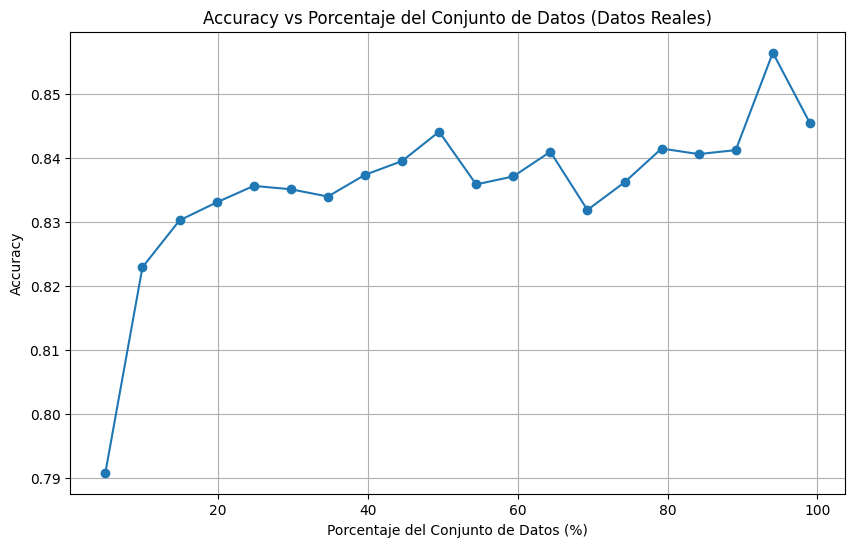

In [69]:
# Definir 20 porcentajes de muestra
percentages = np.linspace(0.05, 0.99, 20)
num_runs = 10  # Número de ejecuciones para promediar
accuracies = []

for percentage in percentages:
    accuracy_runs = []
    for _ in range(num_runs):
        # Dividir los datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=percentage, stratify=y, random_state=None)

        # Verificar que ambas clases estén presentes en el conjunto de entrenamiento
        if len(np.unique(y_train)) < 2:
            continue

        # Crear y entrenar el modelo SVC
        model = SVC(kernel='linear')
        model.fit(X_train, y_train)

        # Predecir etiquetas
        y_pred = model.predict(X_test)

        # Calcular Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_runs.append(accuracy)

    if accuracy_runs:
        avg_accuracy = np.mean(accuracy_runs)
        accuracies.append(avg_accuracy)
        print(f"Porcentaje: {percentage*100}%, Accuracy: {avg_accuracy}")

# Graficar Accuracy vs Porcentaje del Conjunto de Datos
plt.figure(figsize=(10, 6))
plt.plot([p*100 for p in percentages[:len(accuracies)]], accuracies, marker='o')
plt.title('Accuracy vs Porcentaje del Conjunto de Datos (Datos Reales)')
plt.xlabel('Porcentaje del Conjunto de Datos (%)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

##Evaluacion para buscar el mejor resultado (Busqueda por rejilla y validación cruzada)

###Gridsearch
Encontrar los parámetros correctos (como qué valores de C o gamma usar) es una tarea difícil. Pero afortunadamente, podemos probar un montón de combinaciones y ver qué funciona mejor. Esta idea de crear una "cuadrícula" de parámetros y simplemente probar todas las combinaciones posibles se llama Gridsearch, este método es lo suficientemente común como para que Scikit-learn tenga esta funcionalidad incorporada con GridSearchCV. El CV significa validación cruzada.

GridSearchCV toma un diccionario que describe los parámetros que se deben probar y un modelo para entrenar. La cuadricula de parámetros se define como un diccionario, donde las claves son los parámetros y los valores son las configuraciones que se probarán.

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=101)

In [71]:
model = SVC()

In [72]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [73]:
param_grid = {'C': [0.01,0.1,1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf']}

Una de las mejores cosas de GridSearchCV es que es un meta-estimador. Este toma un estimador como SVC, y crea un nuevo estimador, que se comporta exactamente igual, en este caso, como un clasificador. Debería agregar refit = True y elegir verbose al número que desee, más alto el número, más verboso (verboso solo significa el texto de salida que describe el proceso).

In [74]:
from sklearn.model_selection import GridSearchCV

Lo que hace el ajuste es un poco más complicado de lo habitual. En primer lugar, ejecuta el mismo ciclo con validación cruzada, para encontrar la mejor combinación de parámetros. Una vez que tiene la mejor combinación, vuelve a funcionar con todos los datos pasados para ajustarse (sin validación cruzada), para construir un modelo nuevo usando la mejor configuración de parámetros.

In [75]:
grid = GridSearchCV(SVC(probability=True),param_grid,refit=True,verbose = 3) #Cross-Validation

In [76]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.808 total time=   0.2s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.808 total time=   0.2s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.813 total time=   0.2s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.807 total time=   0.3s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.807 total time=   0.2s
[CV 1/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.808 total time=   0.2s
[CV 2/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.808 total time=   0.1s
[CV 3/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.813 total time=   0.1s
[CV 4/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.807 total time=   0.1s
[CV 5/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.807 total time=   0.1s
[CV 1/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.808 total time=   0.1s
[CV 2/5] END ....C=0.01, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [77]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [78]:
best_MVS_model= grid.best_estimator_

In [79]:
best_MVS_model.fit(X_train, y_train)

SVC(C=1000, gamma=0.001, probability=True)

In [80]:
print(grid.cv_results_['rank_test_score'])
print(grid.cv_results_['mean_test_score'])
print(grid.best_score_)
print(grid.best_params_)

[ 9  9  9  9  9  9  9  9  9  9  8  6  9  9  9 25  7  2  9  9 25 30  5  3
  9 25 29 28  1  4]
[0.80889546 0.80889546 0.80889546 0.80889546 0.80889546 0.80889546
 0.80889546 0.80889546 0.80889546 0.80889546 0.81129789 0.82812207
 0.80889546 0.80889546 0.80889546 0.80288579 0.81492677 0.84378472
 0.80889546 0.80889546 0.80288579 0.76684943 0.83417502 0.84255104
 0.80889546 0.80288579 0.76803982 0.79329774 0.84617993 0.83533656]
0.8461799292980304
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


## Resultados finales de  Maquina vectorial de soporte

In [81]:
grid_predictions = grid.predict(X_test)

In [82]:
print(confusion_matrix(y_test,grid_predictions))

[[169   6]
 [ 24  10]]


In [83]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       175
           1       0.62      0.29      0.40        34

    accuracy                           0.86       209
   macro avg       0.75      0.63      0.66       209
weighted avg       0.83      0.86      0.83       209



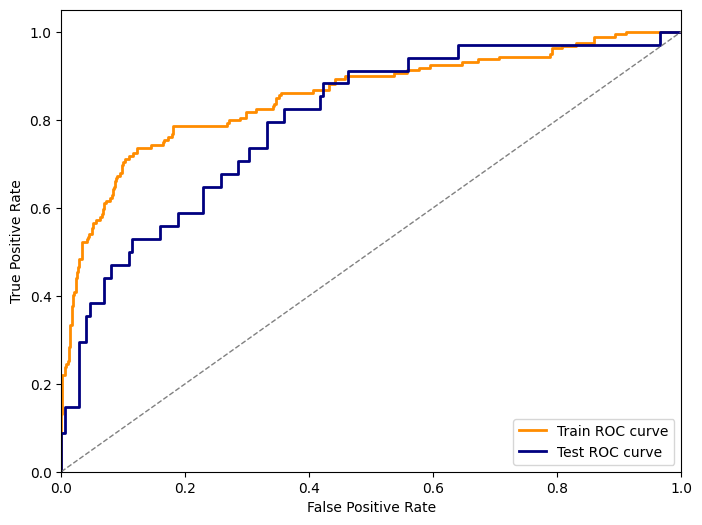

In [84]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Ejemplo de curva ROC
y_pred_train = grid.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)

y_pred_test = grid.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Train ROC curve')
plt.plot(fpr_test, tpr_test, color='navy', lw=2, label='Test ROC curve')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

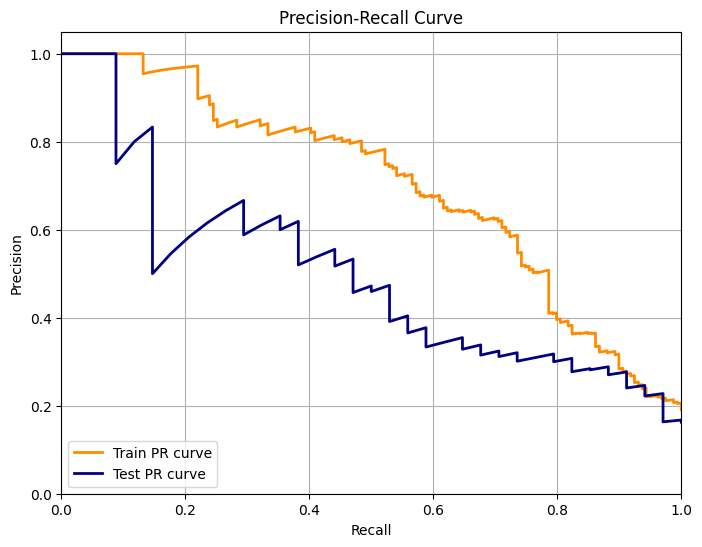

In [85]:
# Ejemplo de curva de precisión-recall
precision_train, recall_train, _ = precision_recall_curve(y_train, y_pred_train)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
plt.plot(recall_train, precision_train, color='darkorange', lw=2, label='Train PR curve')
plt.plot(recall_test, precision_test, color='navy', lw=2, label='Test PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid(True)
plt.show()

#Clasificación mediante Random Forest

In [86]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

Porcentaje: 45.0%, AUC: 0.739576178740253
Porcentaje: 47.10526315789474%, AUC: 0.7485152190051967
Porcentaje: 49.21052631578948%, AUC: 0.7417609735309437
Porcentaje: 51.31578947368421%, AUC: 0.754211529545103
Porcentaje: 53.421052631578945%, AUC: 0.768073136427567
Porcentaje: 55.52631578947369%, AUC: 0.7418111159089505
Porcentaje: 57.631578947368425%, AUC: 0.773949864498645
Porcentaje: 59.73684210526316%, AUC: 0.7769718098665467
Porcentaje: 61.8421052631579%, AUC: 0.7736903570236905
Porcentaje: 63.94736842105263%, AUC: 0.7751400560224091
Porcentaje: 66.05263157894737%, AUC: 0.7801452020202021
Porcentaje: 68.15789473684211%, AUC: 0.7833930704898446
Porcentaje: 70.26315789473685%, AUC: 0.7788641564385272
Porcentaje: 72.36842105263158%, AUC: 0.776836611802489
Porcentaje: 74.47368421052632%, AUC: 0.8008088027837863
Porcentaje: 76.57894736842105%, AUC: 0.7766052484645448
Porcentaje: 78.6842105263158%, AUC: 0.805080177873602
Porcentaje: 80.78947368421052%, AUC: 0.7937323826894379
Porcentaje:

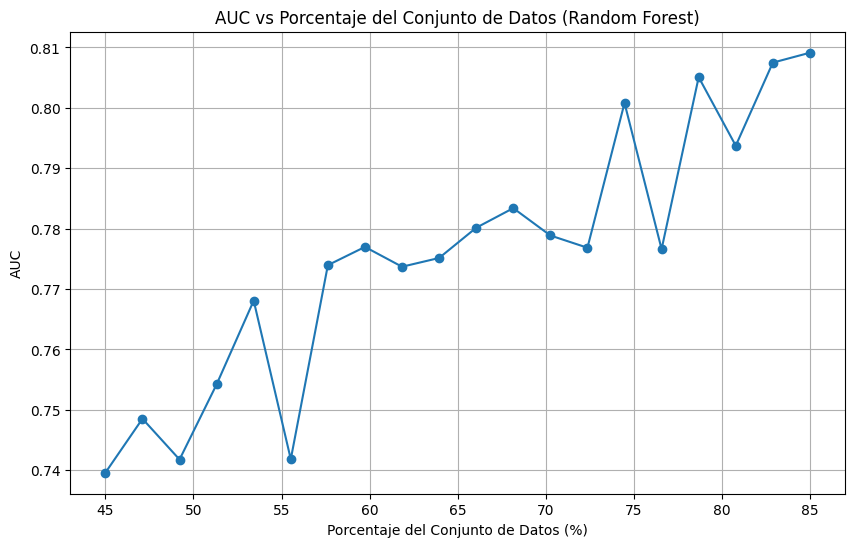

In [87]:
# Definir 20 porcentajes de muestra, evitando 1.0
percentages = np.linspace(0.45, 0.85, 20)
num_runs = 10  # Número de ejecuciones para promediar
auc_scores = []

for percentage in percentages:
    auc_runs = []
    for _ in range(num_runs):
        # Dividir los datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=percentage, stratify=y, random_state=42)

        # Verificar que ambas clases estén presentes en el conjunto de entrenamiento
        if len(np.unique(y_train)) < 2:
            continue

        # Asegurar el balance de clases en el conjunto de entrenamiento
        ros = RandomOverSampler(random_state=42)
        X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

        # Crear y entrenar el modelo Random Forest con más estimadores
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train_resampled, y_train_resampled)

        # Predecir probabilidades
        y_prob = model.predict_proba(X_test)[:, 1]

        # Calcular AUC
        auc = roc_auc_score(y_test, y_prob)
        auc_runs.append(auc)

    if auc_runs:
        avg_auc = np.mean(auc_runs)
        auc_scores.append(avg_auc)
        print(f"Porcentaje: {percentage*100}%, AUC: {avg_auc}")

# Graficar AUC vs Porcentaje del Conjunto de Datos
plt.figure(figsize=(10, 6))
plt.plot([p*100 for p in percentages[:len(auc_scores)]], auc_scores, marker='o')
plt.title('AUC vs Porcentaje del Conjunto de Datos (Random Forest)')
plt.xlabel('Porcentaje del Conjunto de Datos (%)')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

##Evaluacion para buscar el mejor resultado (Busqueda por rejilla y validación cruzada)

In [88]:
rfc = RandomForestClassifier(n_estimators=100)

In [89]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [90]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 200],
    'max_samples' : [0.5, 0.7, 1.0]
}

In [91]:
grid_rf = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring="accuracy", cv = 5)

In [92]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [93]:
sorted(grid_rf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_criterion',
 'param_max_samples',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [94]:
grid_rf.cv_results_["params"]

[{'criterion': 'gini', 'max_samples': 0.5, 'n_estimators': 50},
 {'criterion': 'gini', 'max_samples': 0.5, 'n_estimators': 100},
 {'criterion': 'gini', 'max_samples': 0.5, 'n_estimators': 200},
 {'criterion': 'gini', 'max_samples': 0.7, 'n_estimators': 50},
 {'criterion': 'gini', 'max_samples': 0.7, 'n_estimators': 100},
 {'criterion': 'gini', 'max_samples': 0.7, 'n_estimators': 200},
 {'criterion': 'gini', 'max_samples': 1.0, 'n_estimators': 50},
 {'criterion': 'gini', 'max_samples': 1.0, 'n_estimators': 100},
 {'criterion': 'gini', 'max_samples': 1.0, 'n_estimators': 200},
 {'criterion': 'entropy', 'max_samples': 0.5, 'n_estimators': 50},
 {'criterion': 'entropy', 'max_samples': 0.5, 'n_estimators': 100},
 {'criterion': 'entropy', 'max_samples': 0.5, 'n_estimators': 200},
 {'criterion': 'entropy', 'max_samples': 0.7, 'n_estimators': 50},
 {'criterion': 'entropy', 'max_samples': 0.7, 'n_estimators': 100},
 {'criterion': 'entropy', 'max_samples': 0.7, 'n_estimators': 200},
 {'criterion

In [95]:
print(grid_rf.cv_results_['rank_test_score'])
print(grid_rf.cv_results_['mean_test_score'])
print(grid_rf.best_score_)
print(grid_rf.best_params_)

[11 14 12 17 16  8  1  2  6  6 13  9 18  3 15  9  4  5]
[0.83825116 0.83710837 0.83823832 0.83032871 0.83371212 0.8393811
 0.8450244  0.84390087 0.84051104 0.84051104 0.83711479 0.83937468
 0.82920519 0.84277735 0.83597843 0.83937468 0.84163457 0.84163457]
0.8450243965074472
{'criterion': 'gini', 'max_samples': 1.0, 'n_estimators': 50}


In [96]:
print(grid_rf.best_estimator_)

RandomForestClassifier(max_samples=1.0, n_estimators=50)


##Resultados Finales de Random Forest

In [97]:
grid_rf_predictions = grid_rf.predict(X_test)

In [98]:
print(confusion_matrix(y_test,grid_rf_predictions))

[[128   0]
 [ 20   9]]


In [99]:
print(classification_report(y_test,grid_rf_predictions))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       128
           1       1.00      0.31      0.47        29

    accuracy                           0.87       157
   macro avg       0.93      0.66      0.70       157
weighted avg       0.89      0.87      0.84       157



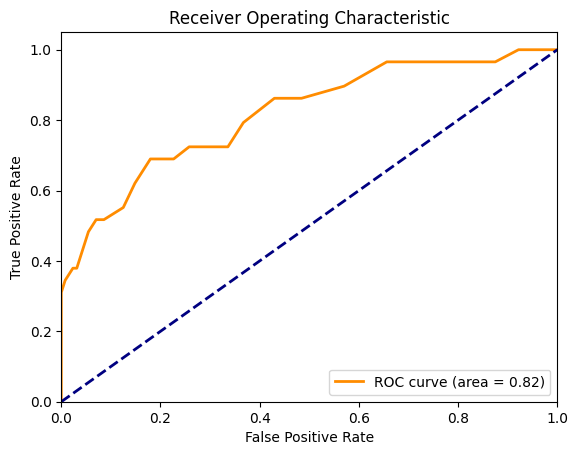

In [100]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades de decisión del modelo
y_scores = grid_rf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#Clasificación mediante Naive Bayes

In [101]:
from sklearn.naive_bayes import GaussianNB

Porcentaje: 35.0%, Accuracy: 0.5982274741506648
Porcentaje: 38.1578947368421%, Accuracy: 0.6102484472049688
Porcentaje: 41.315789473684205%, Accuracy: 0.6088379705400983
Porcentaje: 44.473684210526315%, Accuracy: 0.614853195164076
Porcentaje: 47.63157894736842%, Accuracy: 0.6135531135531135
Porcentaje: 50.78947368421052%, Accuracy: 0.6647173489278753
Porcentaje: 53.94736842105263%, Accuracy: 0.6666666666666667
Porcentaje: 57.10526315789474%, Accuracy: 0.6711409395973156
Porcentaje: 60.26315789473684%, Accuracy: 0.6545893719806763
Porcentaje: 63.421052631578945%, Accuracy: 0.6745406824146982
Porcentaje: 66.57894736842105%, Accuracy: 0.6867816091954023
Porcentaje: 69.73684210526316%, Accuracy: 0.6962025316455697
Porcentaje: 72.89473684210526%, Accuracy: 0.678445229681979
Porcentaje: 76.05263157894737%, Accuracy: 0.728
Porcentaje: 79.21052631578948%, Accuracy: 0.7373271889400923
Porcentaje: 82.36842105263158%, Accuracy: 0.7336956521739131
Porcentaje: 85.52631578947368%, Accuracy: 0.754966

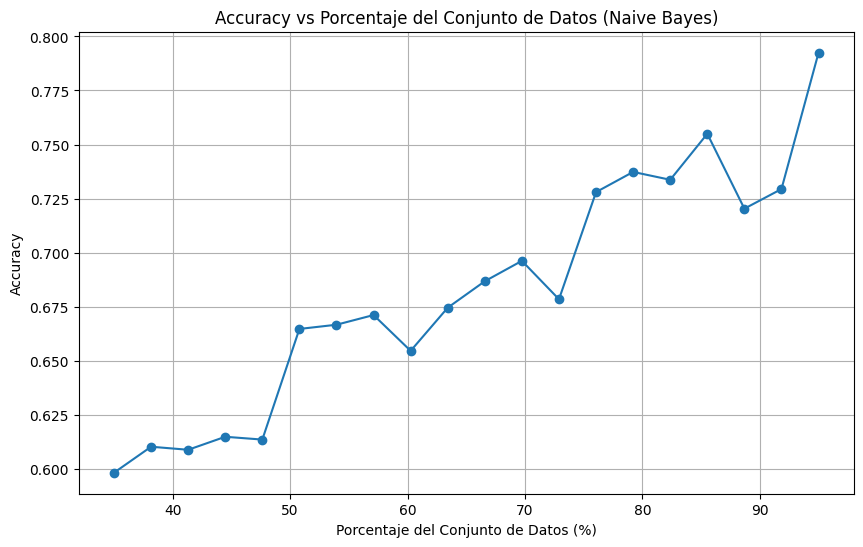

In [102]:
# Definir 20 porcentajes de muestra, evitando 1.0
percentages = np.linspace(0.35, 0.95, 20)
num_runs = 10  # Número de ejecuciones para promediar
accuracies = []

for percentage in percentages:
    accuracy_runs = []
    for _ in range(num_runs):
        # Dividir los datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=percentage, stratify=y, random_state=42)

        # Verificar que ambas clases estén presentes en el conjunto de entrenamiento
        if len(np.unique(y_train)) < 2:
            continue

        # Asegurar el balance de clases en el conjunto de entrenamiento
        ros = RandomOverSampler(random_state=42)
        X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

        # Crear y entrenar el modelo Naive Bayes
        model = GaussianNB()
        model.fit(X_train_resampled, y_train_resampled)

        # Predecir etiquetas
        y_pred = model.predict(X_test)

        # Calcular Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_runs.append(accuracy)

    if accuracy_runs:
        avg_accuracy = np.mean(accuracy_runs)
        accuracies.append(avg_accuracy)
        print(f"Porcentaje: {percentage*100}%, Accuracy: {avg_accuracy}")

# Graficar Accuracy vs Porcentaje del Conjunto de Datos
plt.figure(figsize=(10, 6))
plt.plot([p*100 for p in percentages[:len(accuracies)]], accuracies, marker='o')
plt.title('Accuracy vs Porcentaje del Conjunto de Datos (Naive Bayes)')
plt.xlabel('Porcentaje del Conjunto de Datos (%)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

##Evaluacion para buscar el mejor resultado (Busqueda por rejilla y validación cruzada)

In [103]:
nb_model = GaussianNB()

In [104]:
nb_model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [105]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

In [106]:
grid_nb = GridSearchCV(estimator=nb_model, param_grid=param_grid,  scoring="accuracy", cv = 5)
grid_nb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07]},
             scoring='accuracy')

In [107]:
grid_nb.cv_results_["params"]

[{'var_smoothing': 1e-09}, {'var_smoothing': 1e-08}, {'var_smoothing': 1e-07}]

In [108]:
print(grid_nb.cv_results_['rank_test_score'])
print(grid_nb.cv_results_['mean_test_score'])
print(grid_nb.best_score_)
print(grid_nb.best_params_)

[1 1 1]
[0.79652874 0.79652874 0.79652874]
0.7965287391683331
{'var_smoothing': 1e-09}


##Resultados Finales de Naive Bayes

In [109]:
grid_nb_predictions = grid_nb.predict(X_test)

In [110]:
print(confusion_matrix(y_test,grid_nb_predictions))

[[43  0]
 [ 2  8]]


In [111]:
print(classification_report(y_test,grid_nb_predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      0.80      0.89        10

    accuracy                           0.96        53
   macro avg       0.98      0.90      0.93        53
weighted avg       0.96      0.96      0.96        53



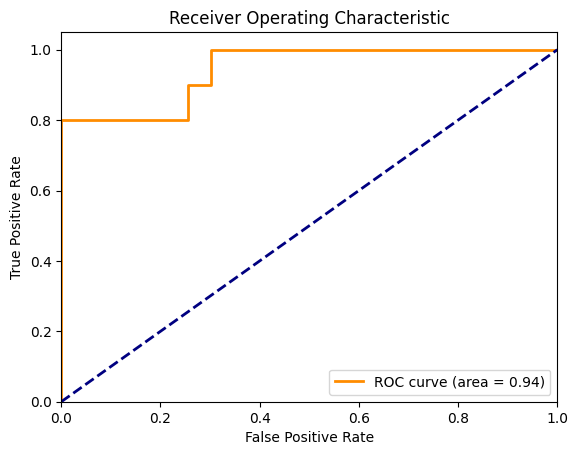

In [112]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades de decisión del modelo
y_scores = grid_nb.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()